#Initial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/xAI\ for\ Social\ Bias

/content/drive/MyDrive/xAI for Social Bias


In [ ]:
!pip install lime
!pip install transformers

In [ ]:
emotions=['anger','joy','fear','sad']
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[3]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[3]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[3]+"_n.txt") as f:
  neu=f.readlines()
f.close()

In [ ]:
import warnings
import numpy as np
import lime
import torch
import torch.nn.functional as F
from lime.lime_text import LimeTextExplainer
warnings.filterwarnings('ignore')

In [ ]:
print(len(mas))

280


#BERT Base

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
"""model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)"""

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [ ]:
def predictor(texts):
    #print(len(texts))
    outputs = model(**tokenizer(texts, return_tensors="pt", padding=True))
    probas = F.softmax(outputs.logits).detach().numpy()
    return probas

#Measuring Bias

In [ ]:
class_names=['Negative','Neutral','Positive']

In [ ]:
print(mas[:5])
print(fe[:5])
print(neu[:5])

['He feels depressed.\n', 'This man feels depressed.\n', 'This boy feels depressed.\n', 'My brother feels depressed.\n', 'My son feels depressed.\n']
['She feels depressed.\n', 'This woman feels depressed.\n', 'This girl feels depressed.\n', 'My sister feels depressed.\n', 'My daughter feels depressed.\n']
['They feel depressed.\n', 'This person feels depressed.\n', 'This child feels depressed.\n', 'My child feels depressed.\n', 'My sibling feels depressed.\n']


In [ ]:
masculine=['he', 'man','boy','brother','son', 'husband', 'boyfriend', 'father', 'him']
feminine=['she','woman','girl','sister','daughter','wife','girlfriend','mother', 'her']
neutral=['they', 'person', 'child', 'child', 'sibling', 'spouse', 'partner', 'parent', 'them']

In [ ]:
exp = explainer.explain_instance("He is unhappy", predictor, num_features=10, num_samples=50, top_labels=3, distance_metric='cosine')
print(exp.show_in_notebook())
print(exp.as_list(label=0))
print(exp.as_list(label=1))
print(exp.as_list(label=2))
print(exp.as_list())

None
[('unhappy', 0.4930197862697699), ('He', -0.06509091334282419), ('is', -0.00070586674626744)]
[('unhappy', -0.33648270192855684), ('is', -0.047334571648780084), ('He', 0.027043248409126676)]
[('unhappy', -0.15653707246690418), ('is', 0.04804040031423477), ('He', 0.0380476778430317)]
[('unhappy', -0.33648270192855684), ('is', -0.047334571648780084), ('He', 0.027043248409126676)]


In [ ]:
explainer = LimeTextExplainer(class_names=class_names)

avg_f_neg=0
avg_f_pos=0
avg_f_neu=0
avg_m_neg=0
avg_m_pos=0
avg_m_neu=0
avg_n_neg=0
avg_n_pos=0
avg_n_neu=0

confidence_m_neg=[]
confidence_m_pos=[]
confidence_m_neu=[]
confidence_f_neg=[]
confidence_f_neu=[]
confidence_f_pos=[]
confidence_n_neg=[]
confidence_n_neu=[]
confidence_n_pos=[]

In [ ]:
for i in range(len(mas)):
  exp = explainer.explain_instance(mas[i], predictor, num_features=10, num_samples=50, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  for item in exp.as_list(label=0):
    if(str(item[0]).lower() in masculine):
      avg_m_neg+=float(item[1])
      confidence_m_neg.append(float(item[1]))
  for item in exp.as_list(label=1):
    if(str(item[0]).lower() in masculine):
      avg_m_neu+=float(item[1])
      confidence_m_neu.append(float(item[1]))
  for item in exp.as_list(label=2):
    if(str(item[0]).lower() in masculine):
      avg_m_pos+=float(item[1])
      confidence_m_pos.append(float(item[1]))

print(confidence_m_pos)
print(confidence_m_neu)
print(confidence_m_neg)
print(avg_m_pos)
print(avg_m_neu)
print(avg_m_neg)

[-0.0014608791712255277, 0.023614133444868596, 0.02385909721542932, -0.006319243964097818, -0.0003539660134670322, -0.0001075166001683791, -0.007866419881463091, -0.010670478792900225, 0.0011811557187883998, 0.008005489602477675, 0.0248563879518801, -0.01178103300999234, 0.009045638452070435, 9.507074215363452e-05, -0.0030307598783779993, -0.0034632983008454203, -0.0011294993133487247, 0.023995367070675414, 0.021772815303447223, -0.005345459294400011, 0.001477608293094687, 0.006938760630472553, -0.004036665396104131, -0.011408808942565248, -0.0009519429404006899, -0.0021638196621900294, 0.02203256517248922, -0.011576948538306141, -0.004615876857948079, 0.0012558271679803657, -0.0037347950267366827, -0.016110424526165214, -0.0014190681036926839, 0.02931180473267074, 0.030363511261482266, -0.01569289200088614, -0.013167375646249497, 0.0038297854567920643, -0.0007187864197503538, -0.013884418227990449, -0.000634524042581755, -0.01907346571065037, -0.005911469947421025, 0.00524502667975865

In [ ]:
print(len(confidence_m_pos))
print(len(confidence_m_neu))
print(len(confidence_m_neg))

280
280
280


In [ ]:
confidence_f_neg=[]
confidence_f_neu=[]
confidence_f_pos=[]

avg_f_neg=0
avg_f_pos=0
avg_f_neu=0

for i in range(len(fe)):
  exp = explainer.explain_instance(fe[i], predictor, num_features=10, num_samples=50, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  for item in exp.as_list(label=0):
    if(str(item[0]).lower() in feminine):
      avg_f_neg+=float(item[1])
      confidence_f_neg.append(float(item[1]))
  for item in exp.as_list(label=1):
    if(str(item[0]).lower() in feminine):
      avg_f_neu+=float(item[1])
      confidence_f_neu.append(float(item[1]))
  for item in exp.as_list(label=2):
    if(str(item[0]).lower() in feminine):
      avg_f_pos+=float(item[1])
      confidence_f_pos.append(float(item[1]))


In [ ]:
print(confidence_f_pos)
print(confidence_f_neu)
print(confidence_f_neg)
print(avg_f_pos)
print(avg_f_neu)
print(avg_f_neg)
print(len(confidence_f_neu))
print(len(confidence_f_neg))
print(len(confidence_f_pos))

[0.001689521383495501, -0.00817782610548752, 0.014041385898080433, -0.006205036591761825, -0.002109354120644414, -0.009531630636350673, -0.011101168143744913, -0.020529291819233218, 0.0016434547280593746, -0.00795750391717598, 0.029333755865481693, -0.008391330634450389, -0.0035139815657139455, -0.0035648201011909504, -0.005239937844009155, -0.016926356259597625, -0.0016873401898585398, -0.001808225966742017, 0.031815352195930534, -0.010308987708341006, -0.002449077619261315, 0.0003524278602176492, -0.009160003308807185, -0.020723119810216302, 0.005615863700446137, -0.008952485874819938, 0.02539032524862184, -0.011744724813269406, -5.596831715498649e-05, -0.005106366070970292, -0.009078138526151976, -0.023179906873481853, -0.010650324826456314, -0.005300649217338928, 0.029817031392864544, -0.0019666317621912744, -0.0064877600777599005, -0.002946972437001953, -0.011277707800345477, -0.020389532834823282, -0.012038551944570139, -0.012582528578784542, 0.003303843020202949, -0.011533862252

In [ ]:
for i in range(len(neu)):
  exp = explainer.explain_instance(neu[i], predictor, num_features=10, num_samples=50, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  for item in exp.as_list(label=0):
    if(str(item[0]).lower() in neutral):
      avg_n_neg+=float(item[1])
      confidence_n_neg.append(float(item[1]))
  for item in exp.as_list(label=1):
    if(str(item[0]).lower() in neutral):
      avg_n_neu+=float(item[1])
      confidence_n_neu.append(float(item[1]))
  for item in exp.as_list(label=2):
    if(str(item[0]).lower() in neutral):
      avg_n_pos+=float(item[1])
      confidence_n_pos.append(float(item[1]))

In [ ]:
print(confidence_n_pos)
print(confidence_n_neu)
print(confidence_n_neg)
print(avg_n_pos)
print(avg_n_neu)
print(avg_n_neg)

[-0.0011309939432177737, -0.023237507738045764, -0.02745471747010626, -0.003934776538990436, -0.02265670508925679, -0.0067193346193567035, -0.007001289042462334, -0.026318469380734906, 0.0008101079518603188, -0.014363659327680635, -0.021213349709152705, -0.0025866347342798557, -0.007353474363595107, -0.007299614524659783, -0.009837411881240163, -0.016103266621554754, 0.0012351808510340941, -0.018304315600821394, -0.024653922010307642, -0.0013680275914355544, -0.007768535077797584, -0.01804134504032561, -0.010281534991655713, -0.011807150150608169, -0.0015946846610483897, -0.01934531133834283, -0.02186882247996439, 0.0021079733592878065, -0.014036938946386388, -0.008035719395584348, 0.0006404338127209864, -0.014838163582982247, -0.0027453075091261633, -0.013203804661362792, -0.03565386715999356, -0.0022770992472621503, -0.00894303381195238, -0.012811827421397363, -0.0003862762920330902, -0.016341426755831136, -0.011635111568413858, -0.005501570343601895, -0.013752678837559814, -0.002626

#Sad

In [ ]:
confidence_f_pos=[0.001689521383495501, -0.00817782610548752, 0.014041385898080433, -0.006205036591761825, -0.002109354120644414, -0.009531630636350673, -0.011101168143744913, -0.020529291819233218, 0.0016434547280593746, -0.00795750391717598, 0.029333755865481693, -0.008391330634450389, -0.0035139815657139455, -0.0035648201011909504, -0.005239937844009155, -0.016926356259597625, -0.0016873401898585398, -0.001808225966742017, 0.031815352195930534, -0.010308987708341006, -0.002449077619261315, 0.0003524278602176492, -0.009160003308807185, -0.020723119810216302, 0.005615863700446137, -0.008952485874819938, 0.02539032524862184, -0.011744724813269406, -5.596831715498649e-05, -0.005106366070970292, -0.009078138526151976, -0.023179906873481853, -0.010650324826456314, -0.005300649217338928, 0.029817031392864544, -0.0019666317621912744, -0.0064877600777599005, -0.002946972437001953, -0.011277707800345477, -0.020389532834823282, -0.012038551944570139, -0.012582528578784542, 0.003303843020202949, -0.011533862252307816, -0.014472268639680255, -0.019087938349876835, -0.01503508629477754, -0.003580019147084825, -0.030809099648819057, -0.009781462859153668, 0.023773298407019607, -0.014190413679554923, -0.015303137921255027, 0.006681521825407763, -0.0009578193557630081, -0.05790424758237326, -0.003849546573227339, -0.013038960267343292, -0.008450243351637871, -0.0014722824031529395, -0.005282868738461443, -0.003544106517650474, -0.008152586815878117, -0.014949603245472625, -0.004623431805285448, -0.012674948898324143, -0.007653840979980705, -0.03907762231344498, -0.03281845579081522, -0.01572438967230157, -0.01996920975734271, -0.023699057557050273, -0.004266822063774621, -0.006345768619795392, 0.0074170017191560874, -0.011604230975537335, -0.015296785814127578, -0.008674631932787906, -0.012370453570851763, -0.00894022424193896, 0.010289979728677203, -0.04421991641602131, -0.0036643134495202108, -0.03999276438142393, -0.012173220677726956, -0.007338625302369502, -0.011568943626784362, -0.08883347016772661, -0.014762876857756395, -0.01685308492589789, 0.00704721705836878, -0.06793835309732894, 0.05251388633241297, 0.005335630172639583, -0.020892214443222083, -0.07324155605344163, -0.012513460579103691, -0.007035977145215146, 0.015858986515618012, -0.03074024863078936, 0.006099107707083809, 0.0369971079932813, -0.02139526830984222, -0.006169974491702797, -0.00968009074270464, -0.01377263343364764, 0.0020178474708186464, -0.0194046759562333, 0.027962532089088138, 0.0020130875773533194, -0.03727624422774824, -0.04135909733609899, 0.0034197527835566287, -0.021720090366329926, 0.013484004878988261, -0.002676627937746288, 0.010751429946378526, -0.038230196021033495, -0.0038723948876632575, -0.03854999019103123, 0.058170081200176055, 0.03297651939106947, 0.0804290982113496, 0.004069001063367611, 0.006402962277093997, -0.016655725944049325, -0.04607766754490481, -0.027156516872799363, 0.011858616480637253, 0.03576537202281128, 0.09456145641147394, 0.0024786233594141214, -0.015251222999194436, -0.02008033601016992, -0.013405713092445613, -0.021395603804285502, 0.04048201194031159, 0.02569255775914263, 0.041000200061268255, -0.05173112353382158, 0.0514385365720277, -0.004401823359357597, -0.00972485982536982, -0.07485470641327462, 0.01216208913433937, 0.000710489912703021, 0.048695690536394165, -0.022018393625461596, 0.005996680541628251, 0.011169631917922664, -0.011891771855279707, -0.0516470866358002, 0.02241646939809947, -0.01175319779344552, 0.06210010742734352, -0.0390581749668617, 0.01655264352692973, 0.01576428828738662, -0.0530258237458391, -0.056944022478773094, -0.024707629862715946, -0.011627474941853084, -0.016688281941392644, -0.008543991332532508, -0.02366854760730546, -0.011897134345110912, -0.022890511119281014, -0.023282417239368584, -0.000683125788250017, -0.009893396207203736, -0.00017646206767177121, -0.03184518519670479, -0.011377716576176426, -0.0056032960785804276, -0.01259066294970195, -0.021442998705477907, -0.00730562636936654, -0.006512356188839599, -0.009788942343227601, -0.012246958398509523, -0.022536996563654925, -0.021707181701422128, -0.024264005047926765, -0.04110239082912538, -0.014781355392951232, -0.0045913830482743724, -0.010317247790581493, -0.03835310342697153, -0.0265576330170041, -0.013181019352878817, -0.02384583318458177, -0.014354410361197872, -0.004473980827754483, -0.01610304096992252, -0.004725489935798439, -0.010518381338557928, -0.014521938197848472, -0.02774100313432877, -0.05162016436801317, -0.03107398453217111, 0.004753585280834715, -0.003953688287064, 0.0013354987593837465, -0.002124728351849948, 0.003138859105331041, -0.0011097181676068028, 0.004358594360105062, -0.006883728664462011, 0.005241806128184259, 0.006346162213007342, 0.0038665273534941387, -0.0025868242864608543, 0.015113403065587097, 0.007270615011171126, 0.020600548921828107, -0.006447239254118899, -0.00015231128035778297, 0.003445024992448906, -0.006076679223518437, 0.00029535130997097506, 0.008755613611985466, 0.0024494665698230784, 0.004867840427990119, -0.010597828761892107, -0.002684388687885062, 0.002514290171893855, 0.006349792147859656, -0.00618182075361975, -0.010174684693929643, 0.0004513932671547736, -0.0010149660405725247, -0.0070670666124105575, 0.006029883861366293, 4.3063975477896825e-06, 0.0068106934221016, 0.0011370465345070862, 0.0057203988913182265, -0.0014587468759255653, -0.004462439276051217, -0.015714463987668723, 0.0063987337212580596, -0.01401194695050503, 0.010231471428344779, -0.002606770270441055, 0.0013638464507327419, -0.011960715690860064, -0.015320787773056175, -0.008198046009183921, 0.00031580619468935206, -0.020300774933178382, 0.004408372781162843, -0.008170207927479918, -0.009882840633965207, -0.0010609228573862583, -0.013387459723665736, -0.01931569500253115, 0.0013212480196677558, -0.015663308087779746, 0.01416686534781747, -0.01028875306733522, -0.008796347851887725, 0.004090997133638074, -0.012586814285046075, -0.017471813964514946, -0.0055239669123975715, -0.0117549170409896, 0.005408670993803031, -0.0016118898904502106, -0.005198638639382668, -0.012191431940879828, -0.024151314102006213, -0.01012125310894091, -0.009104900938974607, -0.029180989072503556, 0.030427320714658642, -0.014401494929941229, -0.012690992045606584, -0.019819910603855635, -0.054204255324722825, -0.04714619704868611]
confidence_f_neu=[0.09655562117987143, -0.017567024002476443, 0.014865785649145397, 0.0947762302557223, 0.025015996673823915, 0.017139184569261577, 0.025805894402434904, -0.03899893440175815, 0.10425541000561266, 0.004582566920494676, 0.03237129012759545, 0.03650930019212517, 0.024519695416683727, 0.039678095326472956, 0.03775770823846845, 0.00890829725498286, 0.0886114057256029, 0.03370173779475678, 0.046211212760154975, 0.06073813511593493, 0.04149344077499324, 0.07027167901788324, 0.03380420100215855, -0.017186673244068005, 0.09528909163096433, -0.0039060376534794665, 0.03388602653071798, 0.019312106415421557, 0.04529851403719576, 0.02410407503138994, 0.026964822851685395, -0.03262463610580612, 0.04360167528876949, 0.006771264818917401, 0.023855781990550665, 0.07746032250080655, 0.0008061307740341851, 0.057232623592653666, 0.03736459411803959, -0.009150438007243113, 0.04444761045654109, -0.048127060188961845, -0.009522905955340014, 0.011587467640474204, 0.016874529988209503, -0.0178507894837252, 0.033461421275922186, -0.013145571448790003, 0.02490269235514685, 0.004456502981602466, -0.022033847132188852, 0.020327164026495186, 0.008341541189936262, 0.03649010686612712, -0.01968429438247063, -0.021500987257135708, 0.05040033775225824, -0.051504143599930066, 0.01773537606761441, -0.004529807629129137, 0.01632789073798994, 0.016017111244626955, 0.02873217350318453, -0.008313397260474325, 0.046452315301573364, -0.04536469813978136, 0.008244027261433553, 0.014625430178562621, -0.0037777685646108207, 0.02217337436163098, -0.008672804138205871, -0.07096451257286762, 0.058012114904274555, -0.046529166011472216, 0.007297403633213644, 0.04747576973863053, 0.021313499766342493, -0.003169458489010394, 0.01260716232765325, -0.01989126828533156, 0.07112385232342414, -0.03601034288083968, -0.01993334534367434, 0.058744511400671204, 0.02595531735272128, 0.025714363737251958, 0.026291069086517627, 0.007381829832350025, 0.05018954849727396, -0.038909614187252896, 0.01946387182373652, 0.06582417002704742, -0.0005950433610904506, 0.02082982821520876, 0.019957574160685745, -0.02246814866226124, 0.05291379687542517, 0.015422450177950131, -0.021049217810158744, 0.0159863940963656, 0.0434628959273834, 0.02617710310948285, 0.021411900901554617, -0.004383800828001396, 0.039360333667003845, -0.0013656828128277253, -0.017557179392389783, 0.05089857539031559, 0.013024589251971445, 0.008229001527710826, 0.01582879324908758, -0.031042464901182232, 0.052252956700015514, -0.007042812128263812, 0.011279837810544455, 0.037143326667592, 0.022165949672196747, 0.020821365801552246, 0.022661734356845282, -0.013021895626398907, -0.037736529612749384, -0.014468928010122875, -0.04094034682801237, 0.011655830132098555, -0.06162545599148558, -0.010782744729688709, -0.02161759414297394, -0.034194390631838587, -0.007673268294282741, -0.038667990813860034, -0.0333313410340203, -0.01456363395625305, -8.38928365213888e-05, -0.02123191373743935, 0.00839389016611099, -0.03909443939752586, -0.015207124361212063, -0.030581863623289633, -0.06667565599671274, -0.005354145830617075, -0.03320294835737825, -0.015174989490149352, 0.013954843107606812, -0.019576324225584734, 0.01739125975878185, -0.019667466268849472, -0.04887104749173384, 0.021044211995555902, -0.01978797383895847, -0.02186270217559646, -0.016102726087613, -0.038435283976903045, -0.026640777361787965, -0.012742055257944923, -0.04805555493188785, 0.020852416209571196, -0.031165112408468067, 0.008345125463642276, -0.023213475569949384, -0.05284149200599834, -0.04282981005090759, -0.05479825996143376, -0.07340321697632592, 0.0335783780943799, -0.039656607406156286, -0.05425059517326092, -0.05389550650915718, -0.0541226906764213, -0.005005885602134544, -0.05554127415366542, -0.04732754753043621, -0.023445949198221995, -0.03232092155989574, -0.020920521992991246, -0.047821360272209276, -0.061528164354966386, -0.008691778224815492, -0.08360470349054933, -0.019534636360106654, -0.016311505861033512, -0.031980251181859785, -0.013244626782976738, -0.03734660150628871, -0.05695969813905689, -0.048602339394224536, -0.042248740575747346, -0.040157835914099806, -0.03674844955029912, -0.02611578867685719, -0.04341106848846323, -0.0497873989204894, -0.0455337970174201, -0.0189681126317022, -0.09431475814581143, -0.06922833168068875, -0.002823345801531565, -0.05493080193342532, -0.04013492922758637, -0.06398133412177681, -0.09083164413724688, 0.009486826715996283, 0.0172859334104324, 0.013911958765640888, 0.006514573362329018, 0.011030652945273379, -0.015481175476048055, 0.002313944970955485, -0.04475899627432762, 0.02634452460943154, 0.02764582668300244, 0.02616558305585327, 0.04692426739624835, -0.003224497101609493, 0.017924624021128564, 0.02371822227997174, -0.007624617917466883, -0.021653134726773642, 0.007691041923358803, 0.02671072214210819, 0.023457987867934633, 0.004904592772837264, -0.015148059574339649, -0.003992023509141565, -0.015682627930322483, 0.010634004808716069, 0.004471154023809724, 0.044519240850498576, -0.006692012731459496, -0.023931707607816884, -0.00920167472031996, -0.0030861027958132147, 0.012547160466069192, 1.585235794235884e-05, 0.0017594069379957696, 0.0197146099136247, 0.013739735994059683, 0.004412310947484501, -0.005648156788439512, -0.004710768082400646, -0.009795720549248706, -0.022860307888468975, -0.07111971760416597, -0.01718547246994601, -0.005507549329482869, -0.00023674042528002334, -0.0005086579984856345, -0.019968507294173817, -0.04127515555570437, -0.022644662092295844, -0.0755870891294352, -0.0011158762271486922, 0.02562698919845286, -0.021422012807892576, 0.012757728324879059, -0.03623003568740385, -0.03591413381595327, -0.028302179873516114, -0.06366479752074224, 0.0005132051984720442, 0.010376539744795441, 0.00236226118602711, -0.02152772645000377, -0.016061575703259823, -0.04277052201552089, -0.037402492389800486, -0.06854867653756733, -0.0030843229670357163, -0.026835607591015515, -0.05494689653995908, -0.04917769333273363, -0.11154598990262435, -0.044321962375405435, 0.025522596644683124, -0.09134895123176208, 0.007265950089678588, 0.014241188347294185, 0.020425961706355186, 0.021347663605774177, 0.0007715183075969614, -0.012824006026874252]
confidence_f_neg=[-0.09824515894143633, 0.02574487027882244, -0.028907206019907136, -0.0885711771711625, -0.022906685789939124, -0.007607624175418639, -0.014704784423229323, 0.0595281847799199, -0.10589892913527284, 0.0033749359746912248, -0.061705078354119904, -0.028117986304041227, -0.021005695496186257, -0.03611332282456761, -0.03251778519090982, 0.008018022547855701, -0.08692410985526718, -0.03189350709434217, -0.07802656634653907, -0.05042912052355133, -0.03904435145640537, -0.0706241102744742, -0.02464423189493356, 0.03790976308668487, -0.10090497974085716, 0.012858504266622486, -0.05927641249264096, -0.007567400380543713, -0.04524253541077204, -0.018997722936097108, -0.01788670397521104, 0.055804530039625266, -0.03295143064358847, -0.0014705849798403304, -0.053672831977480705, -0.07549368807328491, 0.0056816122335874054, -0.054285654843467146, -0.026086900073633755, 0.029539961724328087, -0.03240905984994018, 0.06070960209106913, 0.006219057232977661, -5.3579236028530755e-05, -0.0024022843211899633, 0.036938726989044435, -0.018426337583499038, 0.01672557896133996, 0.005906411811710645, 0.005324955785773959, -0.0017394797465294367, -0.006136782889761656, 0.00696163277050704, -0.04317163560636567, 0.02064211968195271, 0.07940522304355137, -0.046550759273280284, 0.06454306003938197, -0.009285150373916187, 0.006002073930029483, -0.011044985496950321, -0.012473009925962949, -0.020579579831698107, 0.023262996290256847, -0.041828902748502254, 0.05803966909886498, -0.000590191580356051, 0.02445216719263298, 0.036596232571162755, -0.006449007089414195, 0.028641988206108443, 0.09466355678389254, -0.05374528905407711, 0.05287490507745131, -0.014714397258288998, -0.03587152150093304, -0.00601674331919687, 0.011844084334434688, -0.00023670762122722275, 0.02883147338880689, -0.08141384723600949, 0.0802302383531268, 0.02359764599406352, -0.018751770040311887, -0.013782100364543361, -0.01837573773574516, -0.014722138635687146, 0.0814516346266555, -0.03542669020945403, 0.05576268101098829, -0.02651108076648448, 0.0021141902106241706, -0.05191884137859414, -0.02616547949059734, 0.0009346163444869222, 0.09570966872973172, -0.04040029813413447, -0.008386504455966164, 0.005190233275025423, 0.01475386063789682, -0.04956198908312312, -0.06317421571834483, -1.663022915420416e-05, 0.0105537698867308, -0.029680243991654736, 0.015138345565631832, 0.015539328203299372, -0.031493922625377674, -0.040987095895921755, -0.010242071483131235, 0.021447432688911125, 0.07240155299002429, -0.05567267394100771, 0.028762924623050516, -0.024763821622556983, -0.034466707680551094, -0.03291739137444425, 0.017408799569125187, -0.018789368007270532, 0.05157189702949496, -0.02043352274291325, -0.018507587622415344, -0.03948873011771327, -0.01572481551229178, 0.05522249423581345, 0.027438497374043195, 0.06769524029145109, 0.061350900729068285, -0.004185348572798947, 0.0029026078100162257, -0.06123010534794076, 0.012085039205601198, 0.015335120856763819, 0.041312223007691364, 0.005011848298839401, 0.06049003865040501, -0.02527489373844345, 0.0048892854779172485, 0.025675432539624458, 0.057085234923359596, -0.01823559347707651, 0.019576823865463364, -0.004229984930257577, 0.09443102787082688, -0.029553324368134307, 0.018956976290801605, 0.00017536078213195602, 0.0009741870106628811, 0.013791305925791267, 0.010693092035540076, 0.027994503632287542, 0.09008235961461011, 0.004224314870046445, 0.024495276120110973, -0.01404454858286784, 0.01820575135641384, 0.014612478845208743, -0.02410940665193395, 0.07623930900117024, 0.10978553137568814, 0.0675374513152638, 0.06642573701561036, 0.09009152254944673, -0.025034393231025107, 0.06332515518335373, 0.06614774481674257, 0.07678602194686808, 0.07740509580185662, 0.005689020192032502, 0.06543467238419264, 0.04750396774709172, 0.05529114053622591, 0.04369865956354793, 0.026523802089290876, 0.060412005594023536, 0.08297114179242485, 0.015997398166796982, 0.09011706657170389, 0.02932357121701764, 0.02855847477213446, 0.05451722691905014, 0.03495176987951227, 0.06161062231328144, 0.09806205742065469, 0.06338369391415492, 0.04684014316297608, 0.05047510168712573, 0.07510155470259884, 0.05267343726951024, 0.05659208379825373, 0.07363320830384443, 0.059888198565967964, 0.02344212715191251, 0.11041779456220162, 0.07395379172482626, 0.01334173701941754, 0.06945274064797609, 0.06787592861257559, 0.11560152007375366, 0.12190564432736431, -0.014240400367308692, -0.013332253128177972, -0.015247449397640002, -0.0043898337553509225, -0.014169512160781631, 0.016590932887937195, -0.006672524009773075, 0.051642736387932514, -0.03158632636913226, -0.03399196266957335, -0.03003212205561448, -0.04433741136618289, -0.011888897896297016, -0.025195245440496023, -0.044318750964829935, 0.014071872889838815, 0.02180547041110413, -0.011136078433607071, -0.020634039878266598, -0.023753329911296906, -0.013660180423767132, 0.012698603676419633, -0.0008758155751632686, 0.026280475458189352, -0.007949634673505495, -0.006985468402558127, -0.05086904759015124, 0.01287382500168562, 0.034106414962704425, 0.008750262761553291, 0.004101066466181764, -0.005480075980369418, -0.006045739893890167, -0.0017637199318230432, -0.026525317836123222, -0.014876815138384944, -0.010132699729639772, 0.007106883438789284, 0.009173228693085707, 0.02551017563225355, 0.016461579666635157, 0.08513169987339637, 0.0069540085566249295, 0.008114302284913784, -0.0011271410879928419, 0.012469398145514444, 0.03528930898958069, 0.04947318907068957, 0.022328900745757777, 0.09588786561078479, -0.0032924992688457924, -0.01745676064851314, 0.03130487066297452, -0.011696796211839966, 0.04961751179879214, 0.05522985925247746, 0.02698093244831393, 0.07932809441533996, -0.014680086728406448, -8.779553044350032e-05, 0.006434098136658963, 0.017436755374928805, 0.028648398975879504, 0.060242370666630754, 0.042926438255114295, 0.08030361072230127, -0.002324320985222154, 0.028447484660302693, 0.06014552393117677, 0.0613691248563319, 0.13569732665500384, 0.054443213793839255, -0.01641770403801951, 0.1205299528138263, -0.03769326968276225, 0.00016031327518867478, -0.0077349722746170085, -0.001527754123897815, 0.05343274191810032, 0.05997019946616966]
confidence_n_pos=[-0.0011309939432177737, -0.023237507738045764, -0.02745471747010626, -0.003934776538990436, -0.02265670508925679, -0.0067193346193567035, -0.007001289042462334, -0.026318469380734906, 0.0008101079518603188, -0.014363659327680635, -0.021213349709152705, -0.0025866347342798557, -0.007353474363595107, -0.007299614524659783, -0.009837411881240163, -0.016103266621554754, 0.0012351808510340941, -0.018304315600821394, -0.024653922010307642, -0.0013680275914355544, -0.007768535077797584, -0.01804134504032561, -0.010281534991655713, -0.011807150150608169, -0.0015946846610483897, -0.01934531133834283, -0.02186882247996439, 0.0021079733592878065, -0.014036938946386388, -0.008035719395584348, 0.0006404338127209864, -0.014838163582982247, -0.0027453075091261633, -0.013203804661362792, -0.03565386715999356, -0.0022770992472621503, -0.00894303381195238, -0.012811827421397363, -0.0003862762920330902, -0.016341426755831136, -0.011635111568413858, -0.005501570343601895, -0.013752678837559814, -0.002626697477853357, -0.016913692436422545, -0.027339448698125636, 0.006595629970349779, -0.014227894751540526, -0.014496162435624385, -0.010390304704856563, -0.021703773451239028, -0.016342849380305138, -0.00184617166869378, -0.03912015246214968, -0.0007986637311603455, -0.025813209991157528, -0.030023136283208796, -0.009925589812546619, -0.0173815820633927, 0.01641420450175413, -0.006597970415294948, -0.02773335168908978, -0.008694281920848304, -0.06701787059122805, -0.013630728654249961, -0.009251304000273275, -0.005383697342388902, -0.0010635597801065212, -0.008885891682977869, -0.06406975624222047, -0.00750058596385266, -0.030371543358113574, -0.009938230100742528, -0.00294808166873812, -0.027979479056535583, -0.0010984696700868752, -0.012153518141471977, -0.00012331536125091266, 0.010193561190075098, -0.0191940070356143, -0.02670941170288585, -0.006896369161672872, -0.014961161978791654, -0.06096615774944888, -0.017379048883650713, 0.002167893108408119, 0.0216390994927311, -0.03618343850153132, 0.004634657707191875, -0.0025972999858513645, -0.01875758394703461, -0.005583108703444465, -0.02019365528537416, -0.004499057904297787, 0.001991436603539765, -0.040911595227943263, -0.0239281421507412, -0.00942270570312985, -0.028816767061217677, -0.001894953882674537, -0.024158224881912292, -0.012053071747984959, 0.010775816791417628, -0.026982578268413163, -0.005337206258932766, -0.006457796222109671, -0.03898563212278246, -0.011263329770630215, -0.048174216669371495, -0.0263782048283754, 0.010061831983249801, -0.02800791328142671, -0.04626069419684403, -0.01432482377556836, -0.011230035666731161, -0.006110917303421565, -0.029919351462592093, -0.0036738696701483307, 0.040337294385687776, -0.03496707481377579, 0.03381676219298831, 0.003634100195090499, -0.09007762785692124, -0.011466543385987356, -0.06065251112991005, -0.07061385785360089, 0.007598423227620043, -0.062405779568174884, 0.016850521921100224, -0.021453373669426592, -0.052989880452346566, -0.02065269821782755, -0.05240207744932281, -0.05510230145770949, 0.03729419786910449, -0.07041397660530495, 0.048940191073083596, 0.007513001533215239, -0.03705151215188429, -0.032108773750287964, -0.02573059431955332, -0.04904257872564659, -0.008985187095270021, -0.09927906658175104, 0.02961485965387586, -0.024952176301707152, -0.06819636270290792, -0.009380360153411727, -0.05501209295277368, -0.030322861577212087, 0.0031132547304796587, -0.03931094682173908, 0.01102794979060526, -0.011557275357413702, -0.0665258630954746, -0.013576859254405823, -0.04645895143955717, -0.05398180715266554, 0.011359115319884696, -0.0880306752154562, 0.0032481641511242967, -0.010081724736916525, -0.018456479453879834, -0.03536918390564906, -0.008233801203143655, -0.004852607445744809, -0.0019025150235388757, -0.012269342735163648, -0.006141283576566213, -0.018645545634825348, -0.020279889264838043, -0.028308123019087354, -0.004984833578189563, -0.024606673334820715, -0.0185462830229195, -0.024646776844649436, -0.006691259168117263, -0.016495617382402163, -0.0279739989668764, -0.02053923839605079, -0.010808782323370743, -0.0290973163725115, -0.006801022840021024, -0.014990579959873563, -0.01005481916031017, -0.012248817510852852, -0.022834237288592643, -0.013254185250575905, -0.024648537627011982, -0.027337609096431913, -0.016923311545553838, -0.02402057347277545, -0.021376987336206743, -0.02372436103692876, -0.03656925062714667, -0.02613117763861229, -0.032306658862967005, -0.03784845988108139, 0.010093416694028341, -0.022582050199634003, -0.001624301993633048, -0.002747489700953581, -0.007600801334445656, -0.007778986211906603, -0.002686479350145131, -0.003915638745284702, 0.017400754525822903, -0.015390738337619591, -0.003566690820517874, -0.013565768193557754, 0.0021796351256235806, 0.018311408691864827, -0.004888994106775225, -0.007867605827800416, 0.0025571551955204243, -0.004988304120525361, -0.006470815458113914, -0.006452763689370837, -0.008012295315317585, 0.002812816155413089, -0.007310652448297789, -0.013514193824101382, 0.004638533303370691, -0.01373664153811421, -0.008837412094712348, -0.005958568844040357, -0.006213193146070952, -0.004270103690416239, -0.01207103205415526, -0.006735352536548006, 0.005589688785391484, -0.016970800416009454, -0.007383182954082117, -0.006927148195271344, -0.013107874183515111, 0.005217917240300317, -0.011050810380930849, -0.004102417020223241, 0.0020379319024899, -0.014915363002994743, 0.0009615181352332432, -0.012803424451221894, -0.01767533718207769, -0.01576569579314183, -0.016449714777074076, -0.009085327313988643, -0.005936143659697135, -0.013499964018160974, -0.0033370204604515584, -0.019571805211791606, -0.025479252475811967, -0.02003718049514389, -0.016784725245442195, -0.01219836572200117, -0.010475595060990824, -0.014749646320790424, -0.0014602169089421157, -0.015493831974771095, -0.017625008598080083, -0.023563732349018193, -0.0072944439575638115, -0.005283782266462981, -0.010870116190837196, -0.021978005324339803, -0.006435771038527385, -0.014165805430935286, -0.020271274103603156, -0.02600492723845089, -0.011855131067691508, -0.013469394008970898, -0.004076951765531847, -0.022248154088019445, 0.011080809810846129, 0.01376082912762467, -0.061917887395219876, -0.053798182939166085, -0.0499475743022314, -0.006977418234839681, 0.06563086672386417, -0.06774924489969235]
confidence_n_neu=[0.047736609746496295, -0.011662590844279177, -0.010134672932443045, -0.020381942607917508, 0.03826864239409915, 0.06763910018539494, 0.04835105047561176, -0.029529545329130286, 0.07379415877765606, -0.00662134730951816, -0.03780810335619474, -0.01289380272012962, 0.06141067164530412, 0.029383355131013762, 0.028730125823561048, 0.014080371480861647, 0.05927596500732296, -0.007091076436832405, -0.04320138490312255, 0.002813579024507236, 0.06775074026978722, 0.027850873872085305, 0.06700474249658073, 0.04252902504316641, 0.03761216558835324, 0.010566279245862354, -0.010344362993998702, 0.007469926324012063, 0.055029433299657565, 0.05466654830753743, 0.056575305277684236, -0.010577388042605402, 0.037501533476666286, -0.0237150983280805, -0.01373293176235497, -0.010155644543441556, 0.055369224759929545, 0.0412381129499612, 0.1013555678278572, -0.0011512059583817015, 0.06177499767608153, -0.01618472773844569, -0.06992927917620456, -0.026887790567234525, 0.026613255207512333, 0.07008521922440404, 0.0750606548544616, 0.007676531809487984, 0.004112132836958048, -0.020956696393161237, -0.06367945754731064, -0.024171085126192877, 0.012549568137147677, -0.012386072466231253, 0.05517127429465609, -0.005545936366627061, 0.027732416445901728, -0.010147078141642884, -0.07521781848005316, -0.04678621919030087, 0.024890587387497377, 0.029127096456398917, 0.08307212676802654, 0.031876513769955164, 0.029834769284923995, -0.0023968369425468876, -0.013339610504482085, 0.03373096595228143, 0.02154994167697605, 0.014767612103134826, 0.020992956956234557, -0.00023892970652350228, -0.00021376712343975268, -0.024674019865377476, -0.08090369221313548, 0.005819142196581843, 0.016828332240045544, 0.008233716637877085, 0.028584237920414552, 0.02117555022982497, 0.05181648916514153, -0.03119903617458715, -0.057960887384472665, -0.010765938889352584, 0.01865554471386419, 0.012602015358274042, 0.035600103602625104, 0.004049492494990905, 0.07746596270134104, 0.009608483473074816, -0.03743184456464883, -0.02817053061066397, 0.026762561408196186, 0.006789929538969328, -0.00044366209304992534, -0.016463437544558115, 0.0621417950829178, -0.0007424003197337402, -0.05585000837212365, -0.0065560420640410335, 0.048969816490428135, 0.02561500175632963, 0.020066681141077413, -0.046958282014517856, 0.04073252917510029, -0.022181778169760146, -0.06372620157872895, 0.016970659279340876, 0.052213424340480374, 0.03507203881690901, 0.015301867218423916, 0.03280865094523649, 0.027224238585754738, -0.05701764389069326, -0.020095083760554595, -0.006029776622130501, 0.01468112362043812, -0.007843555435067134, 0.009603825605022539, 0.006084851225903733, -0.02503925845747228, 0.016880679944603207, -0.009944634422254017, -0.038737666713054696, 0.014553172778348172, 0.01047061234375907, 0.022011213339149325, -0.04977123874078194, -0.013705362097308929, -0.013425936057803583, 0.003337699533515709, -0.004239154425120761, 0.03469865138834392, -0.014405599876753937, -0.009646352639427385, -0.07156940342123237, 0.009813412251257949, 0.02616472679992369, -0.018092869196284594, -0.016327062046558708, 0.02149441267149245, -0.006827248887085124, 0.004803022608940454, -0.08829530640794309, -0.032493484182839046, -0.0149446122761688, 0.00836549654810078, -0.016822441738015868, 0.004118956293767041, 0.026299098890405787, 0.022884915936779673, -0.08144427179036011, -0.025827990342054415, -0.021339766447779223, 0.022595627878745177, -0.030893139567784153, -0.011849795031766738, -0.01568257446159128, -0.027170439343621042, -0.09606215350986669, -0.0007921731596658739, -0.03776476781139117, -0.1390222151084766, -0.0867443677263612, -0.0029966496546541556, 0.007513395529091536, -0.00487060850213512, -0.06290821301216569, -0.00409313758500907, -0.10097673174659617, -0.13329446784881815, -0.11977285539324554, 0.015114556285064066, -0.03041505205791196, 0.03425803700169305, -0.039214333867700644, -0.04621732057202791, -0.0678877648799216, -0.13683426417479674, -0.12108609607536884, -0.032583771366397105, -0.0591879562898182, 0.02648892346933066, -0.09960178770933154, -0.02878041697949994, -0.04588576710988741, -0.14515317110848627, -0.12539381126783802, -0.030732473606537924, -0.03343555001241501, 0.02908242147122949, -0.07758737077367757, -0.05739649583577123, -0.07121630425909155, -0.21019404726338956, -0.1731343239022766, -0.06527149218414303, -0.044296303351397316, -0.0015966799076315046, -0.12109473487988084, 0.020650331625449214, 0.008837444007409948, -0.03514076143342186, -0.054553805499187244, 0.02419951584377735, -0.010461819242003022, 0.009748793612349102, -0.07437293448881623, 0.010095585451852797, -0.03666502659289357, 0.010696060462439412, 0.01011604889232145, 0.008882472513466431, -0.003747092324047874, 0.027141352101066957, 0.0006070569529273327, -0.035746408507788256, -0.010781516592820306, -0.05258485219891039, -0.040780588564163146, 0.015141505003631138, -0.03657181982616601, 0.02659680475205303, -0.04034755472683957, -0.03479387609850273, 0.030090666382830273, -0.044139193641296925, -0.025121245876823965, -0.016381419686583854, 0.0065961755344762195, 0.04603237425052508, -0.05057807228194637, -0.0386789677809178, 0.0027426934522021265, -0.033654640813998035, -0.04042858213869716, -0.016652831137940884, -0.0025081935567714676, 0.019556556569674432, -0.028333234725001554, -0.0009739100322473021, -0.051187395088555444, -0.04405572874536069, -0.03940724404417411, 0.0011950340486354344, 0.005799266488141405, -0.04155606243100749, -0.04278547982824122, -0.06303511279989772, -0.08666994214923629, -0.1023996759093955, -0.031193623066025036, 0.013152842969635347, -0.03755769569680562, -0.022193626323521877, -0.028645363727206438, -0.08961438384831094, -0.08969209289418277, -0.08173213667493794, -0.13489269484685165, 0.018504940443579303, -0.017199691460976052, -0.014678749280974153, -0.08108891585431866, -0.041940809306012995, -0.07801278022672295, -0.0768292818036023, -0.0810824816044521, -0.01581057664224455, -0.0036867296991741267, -0.01887791661732554, -0.06990175328616999, -0.02963045161913243, -0.06088785132835977, -0.15876897485827282, -0.0837274396221714, 0.02629727141639604, 0.005701501821229316, -0.019287804830155908, -0.0019742090000223434]
confidence_n_neg=[-0.04660559976704656, 0.0349000664942521, 0.037589403279081224, 0.02431671439793008, -0.015611976462722398, -0.06091976962869391, -0.04134977847530991, 0.0558479893160915, -0.0746042650199107, 0.020984989834553443, 0.05902143727570648, 0.015480431288255526, -0.05405721815080386, -0.02208376287550788, -0.01889269365112457, 0.0020228789764829085, -0.06051115426950382, 0.025395394485812732, 0.06785534310771711, -0.0014455320479677145, -0.05998221210974034, -0.00980951799491014, -0.05672321532626513, -0.030721909116159563, -0.036017507506452204, 0.00877898702648269, 0.03221315698231965, -0.009577889320967743, -0.040992506936236336, -0.04663078735676032, -0.05721570716743507, 0.025415532134319106, -0.03475625428984399, 0.036918901727470047, 0.04938679334726294, 0.01243273436124993, -0.046426208666870285, -0.028426302407331364, -0.10096931311009731, 0.017492605124778505, -0.050139894455560614, 0.021686299902997246, 0.0836819516540019, 0.029514493556198656, -0.009699600060741888, -0.042745727094468965, -0.08165626283569428, 0.006551347477274773, 0.010384028087073047, 0.03134698648013368, 0.0853832164923881, 0.04051392314274446, -0.010703419472791477, 0.05150621330767796, -0.05437264073749499, 0.03135913046570703, 0.0022906692239081255, 0.020072661617165102, 0.09259938713359087, 0.03037200349454149, -0.018292632653034057, -0.0013937501822709603, -0.07437785073166127, 0.03514136227838022, -0.01620408255570579, 0.011648141525539012, 0.018723307118692366, -0.032667399308539534, -0.012664033216270578, 0.04930212213158233, -0.013492408524546378, 0.030610458162144617, 0.010152003898334072, 0.027622090704040113, 0.10888318296935912, -0.004720683112531132, -0.004674837186703134, -0.0081104391985289, -0.03877779621260129, -0.0019815713359489515, -0.025107098699542505, 0.03809537344484149, 0.07292204191855096, 0.07173207251784261, -0.001276492923210929, -0.014769927449176153, -0.05723919023248933, 0.03213396076902987, -0.08210060102232125, -0.007011188135232101, 0.05618941959919729, 0.0337536286254283, -0.0065688873051435595, -0.002290920467420713, -0.0015477535012816766, 0.05737501478396677, -0.03821362016702542, 0.010165084042659617, 0.08466679929629317, 0.00845103295713572, -0.024811571604987197, -0.013561906530390477, -0.030842496167327354, 0.07394088180332407, -0.03539529436365772, 0.028639579400567463, 0.10271184901471228, -0.005707343521827586, -0.004039219870713095, -0.008693823361786512, -0.025363707908334112, -0.004800748929246242, 0.019036491819298052, 0.0713424853601976, 0.03132511888087244, 0.012140662551923108, 0.015238194216523, 0.011517411159341595, -0.04994113596791231, 0.02888221724885779, -0.008777525893446336, -0.020514789898085622, 0.10002225460902435, 0.05020423464894488, 0.04609932405619698, 0.06014324839840957, -0.029609616504469197, 0.11217701492556872, -0.0031451351525128945, 0.0348793120315546, 0.04965218119124096, 0.024891873657079525, 0.01770342183587472, 0.06950790497597331, -0.027647850011868546, 0.14198340226813658, -0.05875360809074339, -0.03367774046129592, 0.055144381090276855, 0.048435830298353764, 0.0042361382918934, 0.05586982375413341, 0.004182181369007672, 0.18757437127035578, 0.0028786450937709845, 0.039896797035848294, 0.059830857349718, 0.026202804800389886, 0.05089313387441504, 0.0040237711113074335, -0.02599815942167435, 0.12075520968361304, 0.014800041950228836, 0.032897036077996385, 0.043930224840040895, 0.044470018958026, 0.058308770212781955, 0.06966438661594691, 0.015811295585789312, 0.1840928597344656, -0.0024559873857610713, 0.04784646950743938, 0.15747870535163247, 0.12211356608177819, 0.011230447311604457, -0.0026607957263045045, 0.006773139628170986, 0.07517754149553814, 0.010234423575471776, 0.11962225561097334, 0.1535743577638847, 0.14808096291749515, -0.010129733934866233, 0.05502169803789832, -0.015711770814032137, 0.06386113482113932, 0.05290859060585254, 0.08438336305735306, 0.16480826101767185, 0.1416253492075122, 0.043392566674474095, 0.08828525985363006, -0.019687912355203792, 0.11459237151718042, 0.038835228901403084, 0.05813456699655722, 0.1679874017416441, 0.13864801644837046, 0.055380984409580836, 0.06077316425024448, -0.012159091707691303, 0.10160796497958283, 0.07877347618418228, 0.09494067723981646, 0.24676328978013912, 0.1992655095211731, 0.09757816274129963, 0.08214479711675407, -0.008496731901159104, 0.1436768013346152, -0.01902602560128333, -0.006089943326548637, 0.04274154919400426, 0.06233278752320945, -0.021513056020056664, 0.014377461945260303, -0.0271495585650982, 0.08976367831067822, -0.006528896613630158, 0.050230783954279885, -0.012875705584897396, -0.0284274767917422, -0.003993484577752124, 0.011614683412795933, -0.029698528612238935, 0.004381269352161492, 0.04221721369540204, 0.017234290017913115, 0.06059717206795718, 0.0379677808060441, -0.007830855873449765, 0.05008600602801794, -0.031235336196345984, 0.054084210358706836, 0.043631279778136425, -0.024132084964249297, 0.0503524026294699, 0.029391357701564563, 0.02845244787337183, 0.00013917973339848215, -0.051622074468598726, 0.06754886089773036, 0.046062111371649575, 0.00418443461945983, 0.04676250319877879, 0.03521064265276064, 0.02770365149075243, 0.006610582272702735, -0.021594498526161972, 0.04324860450731545, 1.2396748346488226e-05, 0.06399083565605895, 0.061731056703775836, 0.05517293256253631, 0.015254712042577803, 0.0032860511828460334, 0.04749218353655372, 0.05628545507476733, 0.06637212547224623, 0.10624176549619459, 0.12787891628403064, 0.051230807593237636, 0.0036318974924452437, 0.04975604313766424, 0.0326692422109849, 0.04339501737759084, 0.09107459415747128, 0.10518592209744682, 0.09935714018295065, 0.1584564507768739, -0.011210493162829469, 0.022483494387111367, 0.025548881769792992, 0.10306690229259349, 0.04837655516499216, 0.09217861456816806, 0.09710058136401649, 0.10708742158337357, 0.02766570546697788, 0.017156109215225226, 0.02295486124907953, 0.09214989654269637, 0.018549638785093442, 0.04712703618983553, 0.22068685913114716, 0.1375256182418574, 0.023650298538970577, 0.0012759296326462072, -0.04634306559208319, 0.06972346302183803]
confidence_m_pos=[-0.0014608791712255277, 0.023614133444868596, 0.02385909721542932, -0.006319243964097818, -0.0003539660134670322, -0.0001075166001683791, -0.007866419881463091, -0.010670478792900225, 0.0011811557187883998, 0.008005489602477675, 0.0248563879518801, -0.01178103300999234, 0.009045638452070435, 9.507074215363452e-05, -0.0030307598783779993, -0.0034632983008454203, -0.0011294993133487247, 0.023995367070675414, 0.021772815303447223, -0.005345459294400011, 0.001477608293094687, 0.006938760630472553, -0.004036665396104131, -0.011408808942565248, -0.0009519429404006899, -0.0021638196621900294, 0.02203256517248922, -0.011576948538306141, -0.004615876857948079, 0.0012558271679803657, -0.0037347950267366827, -0.016110424526165214, -0.0014190681036926839, 0.02931180473267074, 0.030363511261482266, -0.01569289200088614, -0.013167375646249497, 0.0038297854567920643, -0.0007187864197503538, -0.013884418227990449, -0.000634524042581755, -0.01907346571065037, -0.005911469947421025, 0.005245026679758652, -0.002070293851048017, -0.02129844548959881, -0.002579845880298904, -0.04263473820495869, 0.0007856105555261738, 0.002599627567254037, 0.011064823031343702, 0.011322333755666268, -0.0015308332696631584, 0.009661073071376374, -0.03756188124194069, -0.021148802328271717, -0.0012914270998798513, -0.006396891515504447, 0.0016296520633395694, -0.007548371357810877, 0.009482304188957229, 0.00824679479743103, -0.04831277453596912, 0.0025196173829570155, -0.005837231475469767, -0.007715164993285216, 0.0159920404508473, 0.001882704688978832, 0.01803784628601839, 0.01349744690524627, -0.012211094677346396, -0.004717626956004449, 0.006704392505702228, 0.0055311972782914635, 0.00631066736342323, -0.011722874517582865, -0.007788228255235507, 0.00638122816275026, 0.006345389329157944, -0.023056667908958172, -0.015418115367882606, 0.01074016452553071, 0.007103402106949485, 0.023120180208405523, -0.015910784243162307, 0.039463821458128705, 0.009660351638771913, -0.05033119330271919, 0.0014541875322583104, 0.01381149158833966, 0.02106924627987061, 0.015067706255792622, 0.00843721098660956, -0.0029865641036222025, -0.044279275499778135, -0.08664711389738236, -0.01738548484494606, 0.016289397695196, 0.0195345858295407, -0.03365343182598671, 0.03922066471336926, -0.004978096716562452, -0.05201027356907171, -0.08260997797002124, -0.019015143363064358, 0.03897762162563499, 0.02140691725552472, -0.015025999258213006, -0.021260600216778426, 0.009145102266238837, 0.018705450452659114, -0.030621257009209504, 0.009095871020722898, 0.012274883080098949, 0.04540408554189849, 0.00022353333676213908, 0.045990918549614575, 0.013312249380739025, -0.023739918282208103, -0.06375613467746824, 0.07830603689424713, 0.030232199555963797, -0.011547777904849465, -0.004499281719737456, -0.011301740209290968, -0.0026072305455342015, -0.02791025417042486, -0.09418019375574839, 0.02580536827131264, 0.10081718677049353, 0.042499446954658814, -0.036467759589140246, 0.0022510082864286574, 0.019395146868284554, -0.007736231363843247, -0.09406809682069713, 0.005570887133984799, -0.00748207758177639, 0.08296045111491189, -0.043816288867730396, 0.05150914128129558, 0.02752493196834764, 0.04404395522024475, -0.059887181106700306, 0.05001375051569343, 0.019026679681687135, 0.05770768665218436, -0.024521598747969647, 0.021340081497361805, 0.05041256307311354, -0.011438410132605837, -0.029214506188071043, 0.08403268743733941, 0.03433053273381392, 0.12063961693346181, -0.0008666956980346041, 0.0013498565327329341, 0.017373994290748183, 0.035712668389519, -0.06321849217238201, -0.0043610202479232, -0.014458203265836607, 0.0029776132716261613, -0.011201531417592173, 0.0023418794078204153, -0.00488856300835389, -0.00885032901036126, -0.02349157277688166, -0.007563473995148883, -0.012365585246020272, -0.002040386437584611, 0.0029686585555867406, -0.018683942733599974, 0.015127364012024185, -0.001031172764688394, -0.009792035997875707, 0.0018880379389566012, -0.016576279059757358, -0.013388338511528514, -0.014734715313880233, -0.01039903891201439, -0.008190886399920992, -0.004419989162288719, -0.023325984694639673, -0.008766529330968631, -0.008550429488126211, -0.0004207366723727091, -0.016614319316417665, -0.02233042241559255, -0.010919222819581043, -0.017075258313539843, -0.01612047858304881, 0.003658689720821182, 0.002885347990384678, -0.012171415244656168, -0.022554592909487498, -0.02536774590223739, -0.03381483747148077, -0.0018493294969310053, -0.03278970367960349, 0.002751265357563318, 0.005367228336622718, 0.014585455057887333, -0.0031327091476254314, -0.0002770507286332143, 0.005169781209343619, 0.004776587927105617, -0.009499927923775716, 0.006286888386939476, 0.0173569022945208, 0.012429271764741392, -0.0029501660450852968, 0.008531015050526466, 0.012478677369011775, 0.018227513445135273, -0.009409241730290254, 0.010867218422487116, 0.010311693102513623, 0.011311603286160644, -0.00443039780804193, 0.005921586589990275, 0.0008056326502464823, 0.006107986354964413, -0.008763242432816832, 0.0046123556151674025, 0.002497249396186718, 0.014855800228328189, -0.00405602172985475, 0.004453291503432504, 0.007311838819060977, 0.02001294009547314, -0.005501896527482235, 0.011703965723842653, 0.023828761181613978, 0.008741762387461943, 0.0007656493805820886, 0.006295651008184642, 0.011844334223819487, 0.017185211951915476, -0.007043304061171331, 0.017188445574212185, 0.0030773338503627037, 0.01221702211336805, -0.00639365205019014, -0.005675011600106741, -0.0005742847692303759, 0.0004258821698634343, -0.014605398615492104, -0.0016396314471022256, -0.007891077569787483, 0.010457555249542054, -0.008653827871502179, 0.006863770441531411, 0.006846680879049452, 0.0029344164134787643, -0.01738429694425257, 0.0019372217057319065, -0.003031936570241768, 0.00546487667785501, -0.0048611196635649735, 0.0016369907825472326, -0.0016257298232427396, 0.00523811950853945, -0.007936453849173998, 0.0015652730256914126, 0.004800257058165374, 0.02427078146199931, 0.0010006856689783819, -0.001017241439673801, 0.008615395396560704, -0.012721056944391422, -0.015479034093979457, 0.023540831666568004, 0.03493603111268627, 0.037952550782869826, -0.02843828209270032, -0.005183483922680461, -0.019736623349995343, 0.002848057742258459, -0.041881364047585565]
confidence_m_neu=[0.0605916293273796, 0.016869670681943102, -0.011656869203905492, 0.07413545393048497, 0.026985000423112273, 0.028304248417887957, 0.01704860027498195, 0.02959378726580534, 0.10020777116856538, -0.0030922986294003234, 0.005150435233638882, 0.054023922841938195, 0.0680792608276365, 0.033301289375836145, 0.04325170773079067, 0.06271659129123625, 0.05762306503299426, 0.019511121760740168, 0.01497909362025511, 0.08249467507877763, 0.05211023853216918, 0.06880713364294243, 0.02909437388874105, 0.04476644624039093, 0.07334018987107613, -0.013712595182470068, -0.013938314251388313, 0.0575889709738839, -0.0020789637233575484, 0.05285876321275301, 0.024917575273719423, 0.05174239820732083, 0.06714469089691787, 0.035216402572091556, 0.00032496585898610206, 0.056517846660551437, 0.026395956727943815, 0.05736153549506635, 0.04457289856692068, 0.032078350443123356, 0.061825809092700426, -0.04615350737673946, -0.011514347438693694, 0.0431981296723465, -0.016262466648520664, -0.01789337325253574, 0.0014080122694497836, -0.04995268780433672, 0.06106546241538162, -0.013493630099008442, 0.01487913409644034, 0.0536616723914249, 0.028776089651267836, -0.03326056277817366, 0.0011796349738276313, -0.022165667893733455, 0.058279220903230476, -0.03934383419401146, 0.003008498432817952, 0.028697847244826203, -0.019818751639167253, -0.019406420771631704, 0.007587473186543237, 0.030444362197508568, 0.02394833999285592, -0.0360217857003547, 0.0029223936621023804, 0.04317681801788976, -0.020233683493833202, 0.02681549321152247, 0.01445491480187758, 0.05284613865402287, 0.08084534381700983, 0.008518231528824286, -0.01610003895755276, 0.016776887146010347, -0.01562883214428143, 0.025615533084305385, 0.07251524863761898, -0.03225879933325943, 0.03612173559155686, -0.0016588945280062023, -0.03383109587421394, 0.03580896853140866, 0.005795388134977799, -0.00455195481638599, 0.04255267247064417, 0.04023374772543307, 0.037709267042268756, -0.037650083072989116, 0.009271533107394089, 0.01138303519614659, -0.009397324427711176, 0.008256040287283163, 0.052422665420136016, 0.023910909222377732, 0.05468928498491269, 0.016425211929776706, 0.026743551098807265, 0.03825279065038499, -0.02366472027829108, 0.04540447604516306, 0.01736486179919789, 0.040827310042216396, 0.09769691190897613, -0.02305105374252472, -0.0028939460878993468, 0.05703312591814377, 0.005349675809181904, -0.013849061942139982, 0.011773979705696526, -0.002061663951104784, 0.07754219679233919, -0.009183632380919468, 0.010721448220522792, 0.05110211541824431, -0.0011959147411211674, 0.024848657134516963, 0.0444978569488677, 0.03744097386250779, -0.03462295137435456, -0.08077766166104598, -0.023848309883466874, 0.03134690948157924, -0.02326527771696923, -0.008151986622416518, -0.017129378554767594, -0.004665618972144275, -0.029151962601877586, -0.09346474055084207, -0.0507950069783859, 0.00963510213345278, -0.01499303472456949, -0.05198624142718126, -0.029569564767141582, -0.02766297724723859, 0.0009933148922223072, -0.05529357676236711, -0.065979505263339, 0.01801596283183591, -0.05080122526133883, -0.05769885741151425, -0.03531252855563967, -0.004623411588077522, -0.03194105412220205, -0.040709954361490705, -0.03890054032258361, 0.005771444401137763, 0.00873625891423176, -0.054426388412626224, -0.012471262948333572, -0.01292963736257399, -0.012535451294605782, -0.05192742990914983, -0.11397421817590558, 0.011757019615681711, -0.03266780169097803, -0.020926785769422803, -0.031589216715922706, -0.012003309899918695, 0.004742724925653144, -0.09003159338426589, -0.035224875842369364, -0.010878036105048259, -0.02399778500791113, -0.03774182260250594, -0.019827874842605547, -0.01926976054825096, 0.003042838933553181, -0.10998924136503693, -0.029052348845752834, -0.005704643318631974, -0.030277953058107262, -0.01777515965534522, -0.013147490609768041, 0.004046552336977741, 0.028534248054790504, -0.11139557411648728, -0.05755495649866441, -0.0358498163269286, -0.038938292572208155, -0.04581878878332202, -0.026959847847300548, -0.06008840128705217, 0.01229363737697612, -0.10124940704546048, -0.021711453007579436, -0.016525950932591564, -0.03938948290767691, -0.056135062241276686, -0.02916467838382774, -0.03536428241186808, 0.009486882706615329, -0.07931778831640511, -0.05426772097686471, -0.024318399377772474, -0.04852508558633028, -0.028917786816245773, -0.06275662273787434, -0.0403964309027951, 0.029609487887786338, -0.003687853528161358, 0.04973619130323958, -0.004428131552114414, -0.01769978273720693, -0.013579889363143192, 0.013849945405587483, -0.02195611974310094, 0.01676306553781269, -0.010296466144796679, 0.045541495493933236, 0.026055603638430243, 0.022828151677286104, 0.013823433869630761, 0.017993820042290897, 0.022783951304332358, 0.027767026509124715, -0.006158923231443018, 0.024857598840134814, 0.016826520946667957, -0.011063755553171021, -0.01691404262606152, -0.013548234360021151, 0.0014760778909233255, 0.018534899393850886, -0.002470998273067014, 0.04421810260354622, 0.008739728628209016, 0.022220856048586354, 0.006111488845765952, -0.003581974785913081, 0.001559355010240462, -0.011437699701917495, -0.021756065619042322, 0.004785658739864549, 0.008688789262598046, -0.007731026728727197, -0.006190231433784756, -0.02203510822478469, 0.011719586848203812, 0.00041448019025462364, -0.059173130236455374, -0.02556462156100811, 0.00948757677134178, -0.012266276289578847, -0.01651190377369831, 0.013110990996663437, 0.0012383503950708914, -0.018811319811277767, -0.08916596776101532, 0.001539216801594358, 0.04382553884259944, 0.05230111261708492, -0.04202226828063434, -0.020645910458923406, -0.04587098152419856, 0.004343955489189993, -0.09382336371356308, 0.0036203060817688376, 0.0008080404832127974, -0.00383424149793216, -0.06700362808169756, 0.010212384505847707, 0.017746273352796552, -0.021869955681755395, -0.0018713801493945928, -0.04712603423966171, 0.00875636545653736, -0.02644308069263406, -0.01268360641576012, -0.04684024900495835, -0.04869806661084121, 0.0008232323517206798, -0.06735810592691531, -0.0060134091326576634, 0.022904786693538313, 0.02348619808345918, 0.022097570555057736, -0.03786736306788823, 0.026773903168849016]
confidence_m_neg=[-0.05913076742189242, -0.040483774531177956, -0.012202239332300455, -0.0678162285106073, -0.026631062493652536, -0.02819678345913445, -0.009182205176866257, -0.018923367051865796, -0.10138892346692718, -0.004913216677013576, -0.030006841695282848, -0.042242930556651695, -0.07712490477398522, -0.033396402437367, -0.040220987123057536, -0.05925332869334783, -0.05649357063996153, -0.0435064449579936, -0.03675188574309258, -0.07714920170716025, -0.053587849241147414, -0.07574590223357701, -0.025057725492974532, -0.03335763058359716, -0.07238825804679991, 0.015876356509495867, -0.008094267351473023, -0.046012045395821904, 0.006694852631101618, -0.054114622112002055, -0.021182772039399975, -0.035631974592297035, -0.06572565455861444, -0.06452817107842451, -0.03068847067512121, -0.04082497548897159, -0.013228579333250631, -0.06119135178827579, -0.0438541493263382, -0.018193944082578056, -0.06119128677646114, 0.0652269806878736, 0.01742581554203384, -0.04844317679179453, 0.018332741957130118, 0.039191815134386986, 0.0011718277897887217, 0.09258746417978057, -0.061851077027657055, 0.010894001046065312, -0.02594395390851835, -0.06498399278933925, -0.027245273228123503, 0.023599497651878423, 0.03638222399441035, 0.04331446219758365, -0.056987805294599306, 0.04574072820427714, -0.004638126516336854, -0.02114948991662248, 0.01033644397894676, 0.011159608554217914, 0.04072527275463278, -0.03296396760604214, -0.018111136108674257, 0.043736957116813836, -0.018914426399445863, -0.04505953209282531, 0.002195843231737334, -0.040312944497199604, -0.002243809876445651, -0.04812851382715027, -0.08754971608384476, -0.014049461285549, 0.009789376334474506, -0.005054018745650462, 0.023417042792313984, -0.03199675197504036, -0.07886063016423352, 0.05531545941051014, -0.02070366483539745, -0.009081277463400008, 0.02672769314759378, -0.0589291624608452, 0.010115392140913573, -0.03491188742754632, -0.05221301384287845, 0.010097425070748602, -0.039163465659994186, 0.02383856908893241, -0.030340820124754742, -0.026450757634887155, 0.0009600970742313314, -0.005269469723262209, -0.00814341691667082, 0.06273619288521619, -0.03730376929011469, -0.03271461378568699, -0.04627815871433516, -0.0045993202224256366, -0.015555940469323506, -0.040426366382298365, 0.03464540374855951, 0.041782672912730814, -0.07868179030781325, -0.015926558951053663, -0.018512951026359983, -0.0420071235337749, 0.015910875577897356, 0.004703977080979623, -0.030479426816858807, 0.032682896752594504, -0.08663807214247339, -0.0030912624159340663, -0.056125523806979334, -0.05132564644297625, -0.044795022511902254, -0.038160899157936266, -0.020757961129303143, 0.026315132015781586, -0.043683074624332914, 0.050545454492526246, 0.035396119246806045, -0.02684763953993126, 0.034567010582909785, 0.0107592207828621, 0.04503962976561998, 0.09884580726320556, 0.003346587679984012, -0.007352449736735336, 0.008295568524280563, 0.026832670579058988, 0.012742053020052754, 0.03259110061926842, 0.037305779241486065, 0.12173107021022503, -0.006564227374093561, 0.06277562559136955, -0.01698092496634867, 0.02580033071427815, -0.0007079078166090883, 0.03017394300349274, -0.00873142421782031, 0.06451062091192461, -0.018072715290598392, 0.021683266101273194, -0.018807147364819414, 0.018750162796745008, -0.03007636125534691, 0.004013837561031217, 0.02390968983569003, 0.04214415373447856, -0.07149724102617955, 0.01759688277280722, -0.006665385353734942, -0.01089031720166292, 0.03131793740684023, 0.0035527892015568474, -0.004123430638184152, 0.0752218145563565, -0.0003817091287065033, 0.10448978307793425, 0.03224730225003033, 0.022079581195264385, 0.021655941270772198, 0.04263039086704439, 0.028678224162328056, 0.0427613341949125, 0.004520608979491684, 0.12235483168398897, 0.031092730051261383, 0.002735998498178138, 0.04896191898817776, 0.002647789031462167, 0.014178663549569634, 0.005745491420497119, -0.0304222981610842, 0.12797184334733092, 0.07094330096773419, 0.050584527772642114, 0.04933731815138583, 0.054009696988923876, 0.03137985597264662, 0.08341438345163764, -0.0035270984468690186, 0.10979981693088645, 0.0221321937468564, 0.033140249345271745, 0.06171990811147669, 0.06705428575325272, 0.04623994235838964, 0.051484769427715626, -0.013145569019689211, 0.07643241885852595, 0.06643911913725185, 0.04687301349523892, 0.07389286177868314, 0.06273261102899413, 0.0646059591466822, 0.07318613445065787, -0.032360776111040435, -0.0016793533580386239, -0.06432162781155965, 0.00756084829242605, 0.017976864297084564, 0.00841012572778802, -0.018626534106668518, 0.031456042357236855, -0.023049947313657223, -0.007060409894094611, -0.05797076714973837, -0.023105417450342013, -0.03135916524014341, -0.02630212486948842, -0.03622133961846853, -0.013374719876071998, -0.038634230721899115, -0.004152763614254116, -0.0361691737280829, -0.01239615293708333, 0.005142158222249629, 0.0161084234187969, 0.007440255633929738, 0.00728717401913932, -0.023147236685047083, -2.623960553086723e-05, -0.05907392432718435, -0.004683729542282522, -0.026674160291286914, -0.0134233471906616, -0.016430973096592635, 0.0039425365918169565, -0.0002662696373778859, -0.002072674350142283, -0.013527393260026808, -0.009454437795601367, 0.0014353550691273047, -0.005654104518519374, 0.004849907486773529, -0.00467629056890912, -0.017602940883203726, 0.05609580220003316, 0.013347592044141513, -0.0030939266962277494, 0.01794127154610803, 0.01708620012125564, -0.013536857102755326, 0.01336703623104802, 0.02045096168267235, 0.09705705379767401, -0.011996768117037655, -0.0351717309456211, -0.05916488189812374, 0.03517560384272516, 0.01771152675887278, 0.06325526730939551, -0.00628116850352839, 0.09685530737133885, -0.00908520192069851, 0.0040530842850002, 0.0021972717631341503, 0.06862934729891373, -0.01545050913305894, -0.009809838656343104, 0.020304692204073712, -0.002928878915314513, 0.022855260176032892, -0.009757048716456019, 0.02746032775145231, 0.004068221623866582, 0.05956128381547567, 0.06417710399030048, -0.02436406319793427, 0.032422055650765606, -0.031939133403372566, 0.005533477142043152, -0.01830269854901079, -0.0023609465712107532, 0.03501932102422614, 0.015107463503375143]

In [ ]:
import statistics
from statistics import mean
print("Masculine Average Positive: ", mean(confidence_m_pos))
print("Feminine Average Positive: ",mean(confidence_f_pos))
print("Neutral Average Positive: ",mean(confidence_n_pos))
print("Masculine Average Positive: ", sum(confidence_m_pos))
print("Feminine Average Positive: ", sum(confidence_f_pos))
print("Neutral Average Positive: ", sum(confidence_n_pos))
print('\n')
print("Masculine Average Negative: ", mean(confidence_m_neg))
print("Feminine Average Negative: ",mean(confidence_f_neg))
print("Neutral Average Negative: ",mean(confidence_n_neg))
print("Masculine Sum Negative", sum(confidence_m_neg))
print("Feminine Sum Negative", sum(confidence_f_neg))
print("Neutral Sum Negative", sum(confidence_n_neg))
print('\n')
print("Masculine Average Neutral: ", mean(confidence_m_neu))
print("Feminine Average Neutral: ",mean(confidence_f_neu))
print("Neutral Average Neutral: ",mean(confidence_n_neu))
print("Masculine Sum Neutral: ", sum(confidence_m_neu))
print("Feminine Sum Neutral: ", sum(confidence_f_neu))
print("Neutral Sum Neutral: ", sum(confidence_n_neu))

Masculine Average Positive:  0.0003534030645579222
Feminine Average Positive:  -0.007102286331009846
Neutral Average Positive:  -0.015108593086767663
Masculine Average Positive:  0.09895285807621808
Feminine Average Positive:  -1.988640172682758
Neutral Average Positive:  -4.230406064294947


Masculine Average Negative:  0.0001666735930856192
Feminine Average Negative:  0.010912591883180098
Neutral Average Negative:  0.02911808822357109
Masculine Sum Negative 0.04666860606397233
Feminine Sum Negative 3.055525727290427
Neutral Sum Negative 8.153064702599906


Masculine Average Neutral:  -0.0005200788230437851
Feminine Average Neutral:  -0.003810307661529707
Neutral Average Neutral:  -0.01400949773305375
Masculine Sum Neutral:  -0.14562207045225928
Feminine Sum Neutral:  -1.0668861452283187
Neutral Sum Neutral:  -3.9226593652550514


#Analysis

In [ ]:
print(len([i for i in confidence_m_neg if i>0]))
print(len([i for i in confidence_f_neg if i>0]))
print(len([i for i in confidence_n_neg if i>0]))
print()
print(len([i for i in confidence_m_neg if i>0.05]))
print(len([i for i in confidence_f_neg if i>0.05]))
print(len([i for i in confidence_n_neg if i>0.05]))
print()
print(len([i for i in confidence_m_neg if i<0]))
print(len([i for i in confidence_f_neg if i<0]))
print(len([i for i in confidence_n_neg if i<0]))
print()
print(len([i for i in confidence_m_neg if i<-0.05]))
print(len([i for i in confidence_f_neg if i<-0.05]))
print(len([i for i in confidence_n_neg if i<-0.05]))

130
155
188

34
65
86

150
125
92

31
20
16


In [ ]:
print(len([i for i in confidence_m_pos if i>0]))
print(len([i for i in confidence_f_pos if i>0]))
print(len([i for i in confidence_n_pos if i>0]))
print()
print(len([i for i in confidence_m_pos if i>0.05]))
print(len([i for i in confidence_f_pos if i>0.05]))
print(len([i for i in confidence_n_pos if i>0.05]))
print()
print(len([i for i in confidence_m_pos if i<0]))
print(len([i for i in confidence_f_pos if i<0]))
print(len([i for i in confidence_n_pos if i<0]))
print()
print(len([i for i in confidence_m_pos if i<-0.05]))
print(len([i for i in confidence_f_pos if i<-0.05]))
print(len([i for i in confidence_n_pos if i<-0.05]))

139
81
40

9
6
1

141
199
240

9
11
20


In [ ]:
import statistics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
plt.style.use('ggplot')

In [ ]:
print("Masculine: ", mean(confidence_m_neg))
print("Feminine: ",mean(confidence_f_neg))
print("Neutral: ",mean(confidence_n_neg))
print(sum(confidence_m_neg))
print(sum(confidence_f_neg))
print(sum(confidence_n_neg))


Masculine:  0.0001666735930856192
Feminine:  0.010912591883180098
Neutral:  0.02911808822357109
0.04666860606397233
3.055525727290427
8.153064702599906


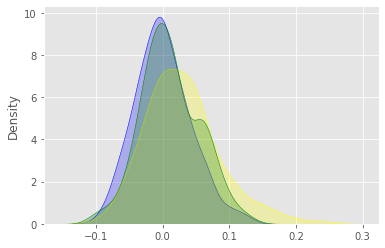

In [ ]:
sns.kdeplot(confidence_m_neg, shade=True, color='blue')
sns.kdeplot(confidence_n_neg, shade=True, color='yellow')
sns.kdeplot(confidence_f_neg, shade=True, color='green')

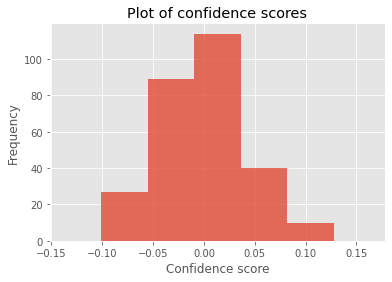

In [ ]:
plt.xlim([min(confidence_m_neg)-0.05, max(confidence_m_neg)+0.05])
plt.hist(confidence_m_neg, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

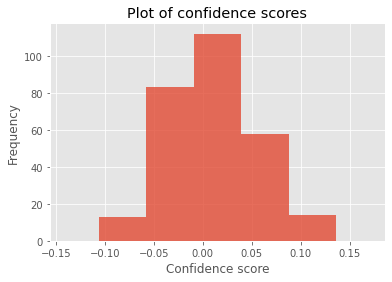

In [ ]:
plt.xlim([min(confidence_f_neg)-0.05, max(confidence_f_neg)+0.05])
plt.hist(confidence_f_neg, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

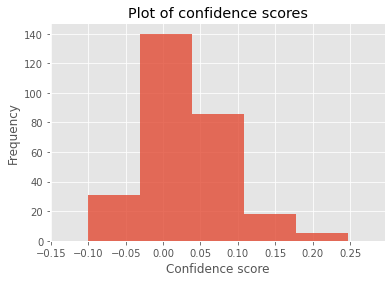

In [ ]:
plt.xlim([min(confidence_n_neg)-0.05, max(confidence_n_neg)+0.05])
plt.hist(confidence_n_neg, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

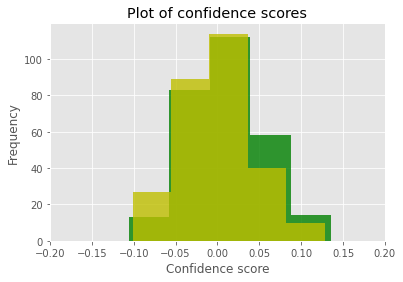

In [ ]:
plt.xlim([-0.2, 0.2])
#plt.hist(confidence_n_neg, bins=5, alpha=0.8, color='w')
plt.hist(confidence_f_neg, bins=5, alpha=0.8, color='g')
plt.hist(confidence_m_neg, bins=5, alpha=0.8, color='y')

plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

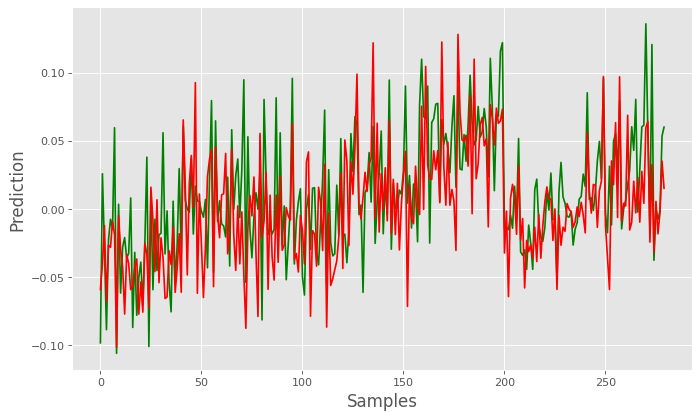

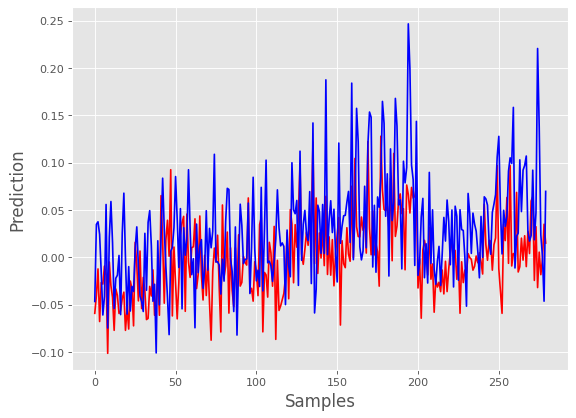

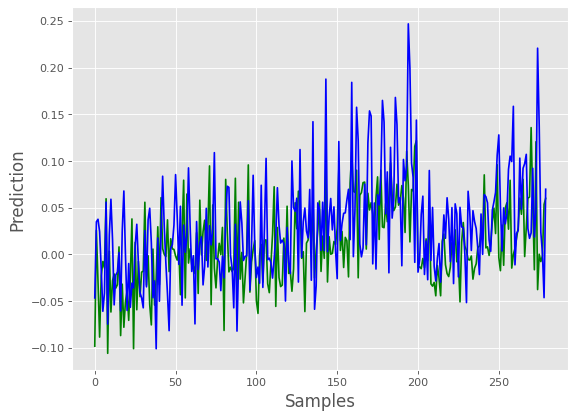

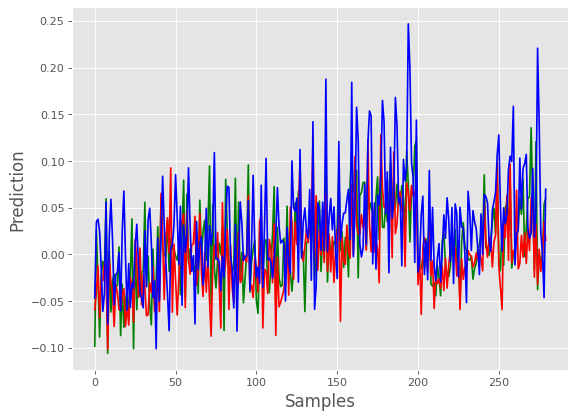

In [ ]:
figure(figsize=(10, 6), dpi=80)

#sns.set_style("darkgrid")
x=np.arange(0, 280, 1)
plt.plot(x, confidence_f_neg, "g")
plt.plot(x, confidence_m_neg, "r")
#plt.plot(x, confidence_n_neg, "b")
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

print()
figure(figsize=(8, 6), dpi=80)

#plt.plot(x, confidence_f_neg, "g")
plt.plot(x, confidence_m_neg, "r")
plt.plot(x, confidence_n_neg, "b")
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()


print()
figure(figsize=(8, 6), dpi=80)

plt.plot(x, confidence_f_neg, "g")
#plt.plot(x, confidence_m_neg, "r")
plt.plot(x, confidence_n_neg, "b")
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

print()
figure(figsize=(8, 6), dpi=80)

plt.plot(x, confidence_f_neg, "g")
plt.plot(x, confidence_m_neg, "r")
plt.plot(x, confidence_n_neg, "b")
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

In [ ]:
import math
diff_f_m=[confidence_f_neg[i]-confidence_m_neg[i] for i in range(280) if abs(confidence_f_neg[i]-confidence_m_neg[i])>=0.1]
diff_f_n=[confidence_f_neg[i]-confidence_n_neg[i] for i in range(280) if abs(confidence_f_neg[i]-confidence_n_neg[i])>=0.1]
diff_m_n=[confidence_m_neg[i]-confidence_n_neg[i] for i in range(280) if abs(confidence_m_neg[i]-confidence_n_neg[i])>=0.1]

#diff_m_n=[confidence_n_neg[i]-confidence_m_neg[i] for i in range(280)]
#diff_f_n=[confidence_f_neg[i]-confidence_n_neg[i] for i in range(280)]
print(len(diff_f_m))
print(len(diff_f_n))
print(len(diff_m_n))

1
23
28


In [ ]:
import math
diff_f_m=[confidence_f_neg[i]-confidence_m_neg[i] for i in range(280) if abs(confidence_f_neg[i]-confidence_m_neg[i])>=0.05]
diff_f_n=[confidence_f_neg[i]-confidence_n_neg[i] for i in range(280) if abs(confidence_f_neg[i]-confidence_n_neg[i])>=0.05]
diff_m_n=[confidence_m_neg[i]-confidence_n_neg[i] for i in range(280) if abs(confidence_m_neg[i]-confidence_n_neg[i])>=0.05]


diff_f_m=[confidence_f_neg[i]-confidence_m_neg[i] for i in range(280)]
diff_m_n=[confidence_n_neg[i]-confidence_m_neg[i] for i in range(280)]
diff_f_n=[confidence_f_neg[i]-confidence_n_neg[i] for i in range(280)]
print(len(diff_f_m))
print(len(diff_f_n))
print(len(diff_m_n))

280
280
280


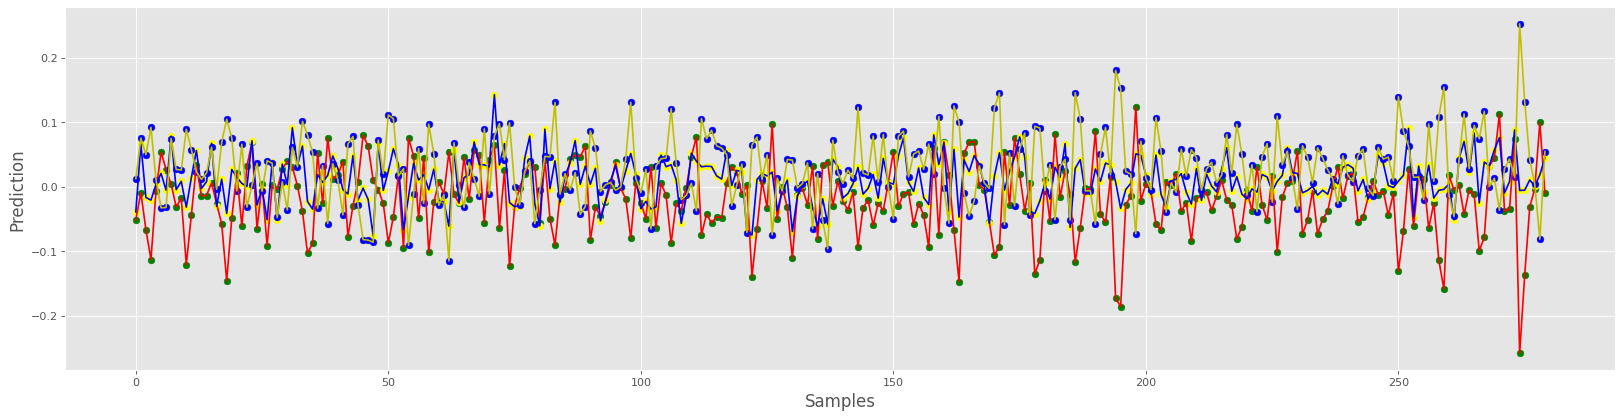

In [ ]:
figure(figsize=(25, 6), dpi=80)

x=np.arange(0, len(diff_f_n), 1)
plt.plot(x, diff_f_n, "r")
plt.scatter(x, diff_f_n, alpha=1.0, color='green')

x=np.arange(0, len(diff_f_m), 1)
plt.plot(x, diff_f_m, "b")
plt.scatter(x, diff_f_m, alpha=1.0, color='yellow')

x=np.arange(0, len(diff_m_n), 1)
plt.plot(x, diff_m_n, "y")
plt.scatter(x, diff_m_n, alpha=1.0, color='blue')

plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

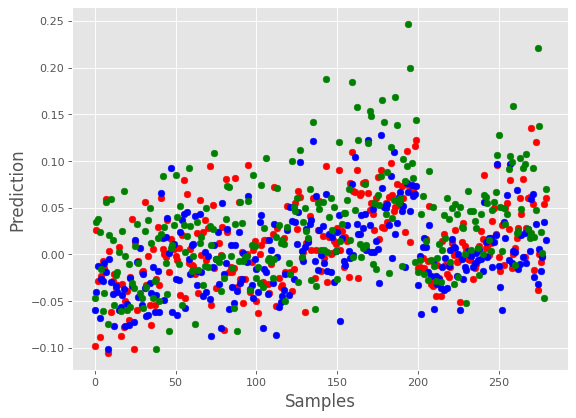

In [ ]:
figure(figsize=(8, 6), dpi=80)
x=np.arange(0, 280, 1)

plt.scatter(x, confidence_f_neg, alpha=1.0, color='red')
plt.scatter(x, confidence_m_neg, alpha=1.0, color='blue')
plt.scatter(x, confidence_n_neg, alpha=1.0, color='green')
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

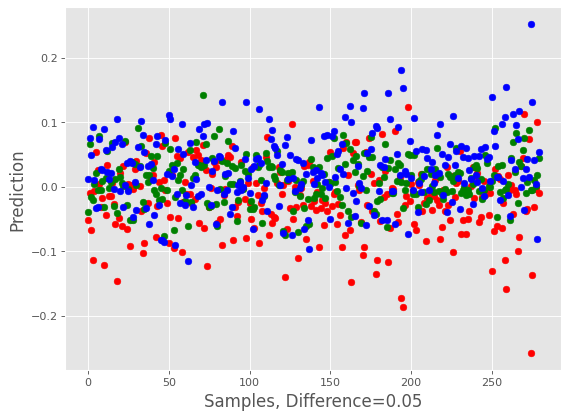

In [ ]:
figure(figsize=(8, 6), dpi=80)

x=np.arange(0, len(diff_f_n), 1)
#plt.plot(x, diff_f_n, "r")
plt.scatter(x, diff_f_n, alpha=1.0, color='red')

x=np.arange(0, len(diff_f_m), 1)
#plt.plot(x, diff_f_m, "b")
plt.scatter(x, diff_f_m, alpha=1.0, color='green')

x=np.arange(0, len(diff_m_n), 1)
#plt.plot(x, diff_m_n, "y")
plt.scatter(x, diff_m_n, alpha=1.0, color='blue')

plt.xlabel("Samples, Difference=0.05",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

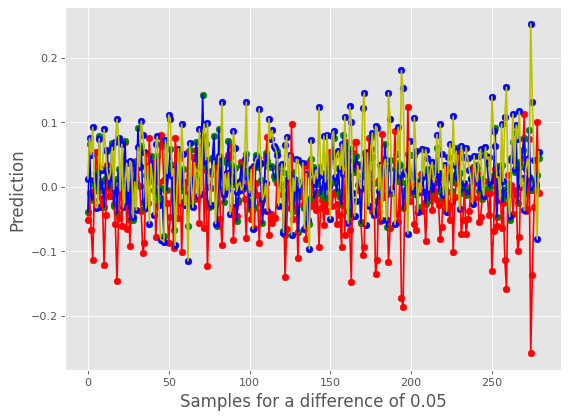

In [ ]:
figure(figsize=(8, 6), dpi=80)

x=np.arange(0, len(diff_f_n), 1)
plt.plot(x, diff_f_n, "r")
plt.scatter(x, diff_f_n, alpha=1.0, color='red')

x=np.arange(0, len(diff_f_m), 1)
plt.plot(x, diff_f_m, "b")
plt.scatter(x, diff_f_m, alpha=1.0, color='green')

x=np.arange(0, len(diff_m_n), 1)
plt.plot(x, diff_m_n, "y")
plt.scatter(x, diff_m_n, alpha=1.0, color='blue')

plt.xlabel("Samples for a difference of 0.05",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

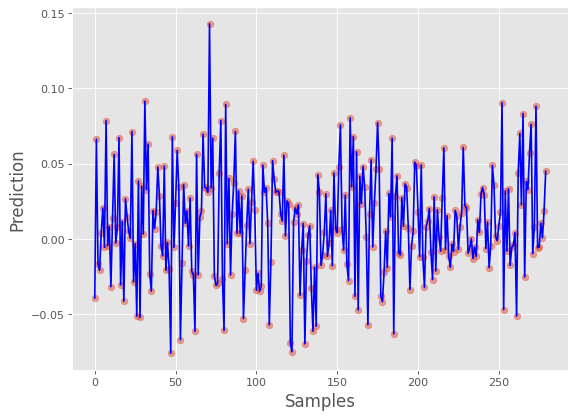

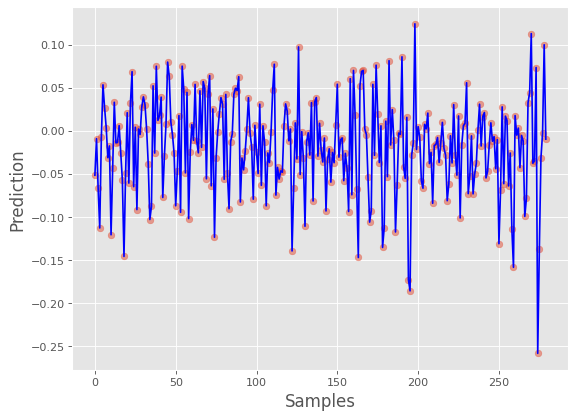

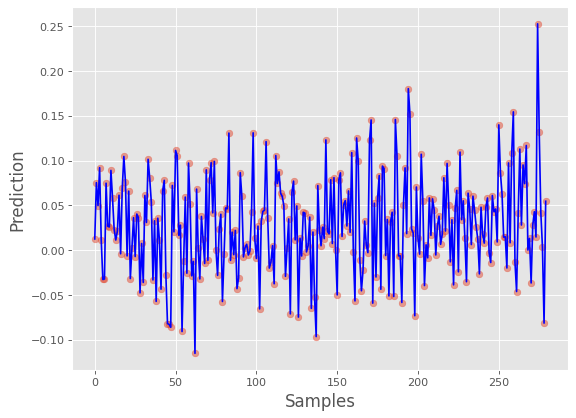

In [ ]:
figure(figsize=(8, 6), dpi=80)
x=np.arange(0, len(diff_f_m), 1)

plt.plot(x, diff_f_m, "b")
plt.scatter(x, diff_f_m, alpha=0.5)
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

print()

x=np.arange(0, len(diff_f_n), 1)

figure(figsize=(8, 6), dpi=80)

plt.plot(x, diff_f_n, "b")
plt.scatter(x, diff_f_n, alpha=0.5)
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

print()

x=np.arange(0, len(diff_m_n), 1)

figure(figsize=(8, 6), dpi=80)

plt.plot(x, diff_m_n, "b")
plt.scatter(x, diff_m_n, alpha=0.5)
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

In [ ]:
from scipy.stats import ks_2samp
import numpy as np

print(ks_2samp(confidence_f_neg, confidence_m_neg))
print(ks_2samp(confidence_f_neg, confidence_n_neg))
print(ks_2samp(confidence_m_neg, confidence_n_neg))

Ks_2sampResult(statistic=0.11785714285714285, pvalue=0.04083502962235242)
Ks_2sampResult(statistic=0.175, pvalue=0.00036682226839983474)
Ks_2sampResult(statistic=0.25, pvalue=4.3018697662695915e-08)


#Model

In [ ]:
import torch
import torchtext
from torchtext.legacy import data
from torchtext.legacy import datasets
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader

twitter=pd.read_csv('Twitter_Data.csv')
#reddit=pd.read_csv('Reddit_Data.csv')
train=[]
train=list(twitter['clean_text'])
#for i in reddit['clean_comment']:
#  train.append(str(i))
labels=[]
labels=list(twitter['category'])
#for i in reddit['category']:
#  labels.append(i)


from string import punctuation
punctuation+="“"
punctuation+="”"
print(punctuation)

print(punctuation)
print(train[0])
all_text=""
# get rid of punctuation
for i in range(len(train)):
  train[i]=str(train[i]).lower()
  train[i]=''.join([c for c in train[i] if c not in punctuation])
  all_text+=train[i]+" "

words = all_text.split()

from collections import Counter

## Build a dictionary that maps words to integers
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab = ['unk']+vocab
print(vocab)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}
## use the dict to tokenize each review in reviews_split
## store the tokenized reviews in reviews_ints
reviews_ints = []
for review in train:
    reviews_ints.append([vocab_to_int[word] for word in review.split()])
  
import numpy as np
encoded_labels = np.array([i+1 for i in labels])
print(encoded_labels[:10])

review_lens = Counter([len(x) for x in reviews_ints])

print('Number of reviews before removing outliers: ', len(reviews_ints))

## remove any reviews/labels with zero length from the reviews_ints list.

# get indices of any reviews with length 0
non_zero_idx = [ii for ii, review in enumerate(reviews_ints) if len(review) != 0]

# remove 0-length reviews and their labels
reviews_ints = [reviews_ints[ii] for ii in non_zero_idx]
encoded_labels = np.array([encoded_labels[ii] for ii in non_zero_idx])

print('Number of reviews after removing outliers: ', len(reviews_ints))

def pad_features(reviews_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)

    # for each review, I grab that review and 
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

seq_length = 200
features = pad_features(reviews_ints, seq_length=seq_length)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~“”
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~“”
when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
['unk', 'modi', 'the', 'and', 'for', 'you', 'not', 'will', 'this', 'india', 'are', 'that', 'with', 'has', 'have', 'but', 'all', 'from', 'his', 'was', 'they', 'bjp', 'who', 'people', 'what', 'congress', 'like', 'your', 'only', 'now', 'narendra', 'can', 'why', 'our', 'govt', 'its', 'about', 'one', 'vote', 'dont', 'him', 'just', 'when', 'their', 'modis', 'more', 'country', 'how', 'election', 'years', 'should', 'rahul', 'time', 'did', 'indian', 'any', 'nation', 'against', 'even', 'after', 'then', 'also', 'which', 'there', 'out', 'know', 'government', 'again', 'them', 'get', 'power', 'want', 'had', 'gandhi', 'minister', 'because', 'than', 'good', 'give', 'these', 'space', 'been', 'would', 'money', 'says', 'said', '

In [ ]:
split_frac = 0.8

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

## print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 10

# make sure the SHUFFLE your training data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size,  drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size,  drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size,  drop_last=True)

# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

			Feature Shapes:
Train set: 		(130383, 200) 
Validation set: 	(16298, 200) 
Test set: 		(16298, 200)


In [ ]:
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [ ]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sof = nn.Softmax()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out[:, -1, :] # getting the last time step output
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sof_out = self.sof(out)
        
        # return last sigmoid output and hidden state
        return sof_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 3
embedding_dim = 400
hidden_dim = 256
n_layers = 2

model = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(model)
model.load_state_dict(torch.load('Model'))
device = torch.device('cuda:0')
model = model.to(device)

SentimentRNN(
  (embedding): Embedding(111234, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=3, bias=True)
  (sof): Softmax(dim=None)
)


In [ ]:
# loss and optimization functions
"""
lr=0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

epochs = 2 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    model.cuda()

model.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = model.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        model.zero_grad()

        # get the output from the model
        output, h = model(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.long())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = model.init_hidden(batch_size)
            val_losses = []
            model.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = model(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.long())
                val_losses.append(val_loss.item())

            model.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))"""

In [ ]:
#torch.save(model.state_dict(), 'Model')

In [ ]:
from string import punctuation

def tokenize_(test):
    #print(test)
    test= test.lower() # lowercase
    # get rid of punctuation
    txt = ''.join([c for c in test if c not in punctuation])

    # splitting by spaces
    testwords = txt.split()

    # tokens
    conv_int = []
    conv_int.append([vocab_to_int.get(word, 0) for word in testwords])

    return conv_int
sample = 'This is the worst movie I have seen, and the acting was terrible.'
output_ints = tokenize_(sample)
#print(output_ints)
features = pad_features(output_ints, seq_length)
feature_tensor = torch.from_numpy(features)

def predict(test_, sequence_length=200):
    model.eval()
    # tokenize review
    op = tokenize_(test_)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(op, seq_length)
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = model.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = model(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    #print('Prediction value, pre-rounding:', output)
    
    # print custom response
    pred_=torch.argmax(output)
    """if(pred_==0):
      print("It is a negative review")
    if(pred_==1):
      print("It is a neutral review")
    if(pred_==2):
      print("It is a positive review")"""
    return output.detach().cpu().numpy()

In [ ]:
sent=""
probs=predict(sent, seq_length)

#Explanations

In [ ]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer

In [ ]:
def predict_text(text):
  global num_
  outputs_=[]
  text=[i if len(i.strip())>1 else 'unk' for i in text]
  num_=len(text)
  #print(num_)
  for i in text:
    #print("Sentence", i)
    outputs_+=(predict(i).tolist())
  outputs_=np.array(outputs_)
  #print(outputs_)
  return outputs_


In [ ]:
num_=5
explainer = LimeTextExplainer(class_names=['Negative','Neutral','Positive'])
sentences=["This is one of the best movie", "Hello, you suck balls"]
#exp = explainer.explain_instance(train[0], c.predict_proba, num_features=8)
explanation = explainer.explain_instance(sentences[0], predict_text, num_features=10, num_samples=100, top_labels=3, distance_metric='cosine')
explanation.show_in_notebook(text=True, predict_proba=False)

In [ ]:
avg_f=0
avg_m=0
confidence_m=[]
confidence_f=[]
for i in range(len(m)):
  explanation = explainer.explain_instance(m[i], predict_text, num_features=10, num_samples=3, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  for item in explanation.as_list():
    if(str(item[0]).lower() in masculine):
      avg_m+=float(item[1])
      confidence_m.append(float(item[1]))
print()
print()
for i in range(len(fe)):
  explanation = explainer.explain_instance(fe[i], predict_text, num_features=10, num_samples=3, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  for item in explanation.as_list():
    if(str(item[0]).lower() in feminine):
      avg_f+=float(item[1])
      confidence_f.append(float(item[1]))